In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import warnings
warnings.filterwarnings('ignore')
alt.renderers.enable('notebook')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
data = pd.read_excel("base_de_dados.xlsx")

In [3]:
list(data)

['Agencia',
 'Exercicio_Apurado',
 'Num_Processo',
 'Ministerio',
 'Tipo_Processo',
 'Tipo_Alterado',
 'Status_Processo',
 'Data_Autuacao',
 'Data_Encerramento',
 'Relator',
 'Quantidade_Relatores',
 'Unidade_Tecnica_Responsavel',
 'Unidade_Tecnica_Por_Agir',
 'Confidencialidade',
 'quant_responsaveis',
 'decisao_normativa',
 'instrucao_normativa',
 'deliberacoes_quantidade',
 'determinacoes',
 'recomendacoes',
 'sancoes',
 'alerta']

In [4]:
data.head()

,Agencia,Exercicio_Apurado,Num_Processo,Ministerio,Tipo_Processo,Tipo_Alterado,Status_Processo,Data_Autuacao,Data_Encerramento,Relator,Quantidade_Relatores,Unidade_Tecnica_Responsavel,Unidade_Tecnica_Por_Agir,Confidencialidade,quant_responsaveis,decisao_normativa,instrucao_normativa,deliberacoes_quantidade,determinacoes,recomendacoes,sancoes,alerta
0,I,2010.0,1,a,PC - Prestação de Contas,NÃO,Encerrado,40772.0,41603,ALC,3.0,A,B,Restrito,5,DN 2010-110,IN 2008-057; IN 2010-063,1.0,Não,Sim,Não,Não
1,I,2002.0,2,a,PC - Prestação de Contas,NÃO,Encerrado,37789.0,38484,JN,3.0,B,A,Restrito,5,N/D,IN 2000-037; IN 2002-042; IN 2002-045,1.0,Sim,Não,Não,Não
2,I,2004.0,3,a,PC - Prestação de Contas,SIM,Encerrado,38512.0,39127,BZ,1.0,C,B,Restrito,5,DN 2004-062,IN 2002-045; IN 2004-047,1.0,Sim,Não,Não,Não
3,I,2006.0,4,a,PC - Prestação de Contas,NÃO,Encerrado,39269.0,39968,WR,2.0,A,A,Restrito,5,DN 2006-081,IN 2004-047,1.0,Sim,Não,Não,Não
4,I,2009.0,5,a,PC - Prestação de Contas,NÃO,Encerrado,40386.0,40612,ALC,1.0,B,B,Restrito,5,DN 2009-102,IN 2008-057,1.0,Não,Sim,Não,Sim


## 1. Qual a relação entre a quantidade de processos com
### a) A agência

In [5]:
agencias = pd.DataFrame(data.groupby("Agencia").count()["Exercicio_Apurado"])
agencias.columns = ["Quantidade"]
agencias.reset_index(level=0, inplace=True)
agencias

,Agencia,Quantidade
0,I,12
1,II,7
2,III,19
3,IV,5
4,IX,26
5,V,17
6,VI,17
7,VII,14
8,VIII,10


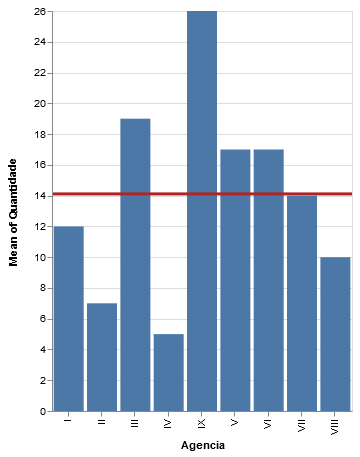

In [6]:
brush = alt.selection(type='interval', encodings=['x'])

bars = alt.Chart(width=300, height=400).mark_bar().encode(
    x='Agencia:O',
    y='mean(Quantidade):Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7))
).add_selection(
    brush
)

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(Quantidade):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

alt.layer(bars, line, data=agencias)

Este gráfico é interativo. Caso tenha problemas em interagir, clique [aqui](https://bit.ly/2CYRM4H).

### b) O ano

In [7]:
pd.options.display.float_format = '{:,.0f}'.format
anos = pd.DataFrame(data.groupby("Exercicio_Apurado").count()["Num_Processo"])
anos.reset_index(level=0, inplace=True)
anos.columns = ["Ano", "Quantidade"]
anos

,Ano,Quantidade
0,"1,997",1
1,"1,998",2
2,"1,999",5
3,"2,000",5
4,"2,001",5
5,"2,002",7
6,"2,003",9
7,"2,004",8
8,"2,005",7
9,"2,006",8


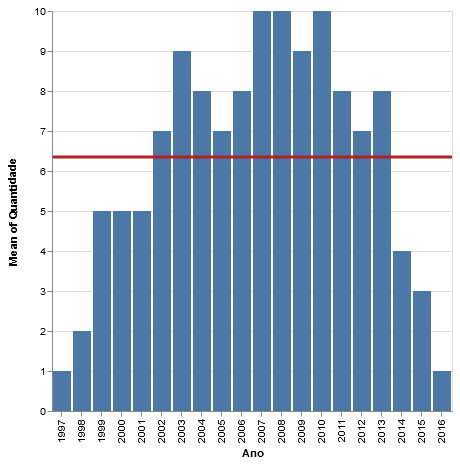

In [8]:
bars = alt.Chart(width=400, height=400).mark_bar().encode(
    x='Ano:O',
    y='mean(Quantidade):Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7))
).add_selection(
    brush
)

alt.layer(bars, line, data=anos)

Este gráfico é interativo. Caso tenha problemas em interagir, clique [aqui](https://bit.ly/2HJ4Cto).

### c) A agência em cada ano

In [9]:
pd.DataFrame(data.groupby(["Agencia", "Exercicio_Apurado"]).count()["Num_Processo"])

Num_Processo
Agencia Exercicio_Apurado              
I       2,001                         1
        2,002                         1
        2,004                         1
        2,006                         2
        2,007                         2
        2,008                         1
        2,009                         1
        2,010                         2
        2,013                         1
II      2,007                         1
        2,008                         1
        2,009                         1
        2,010                         1
        2,011                         1
        2,012                         1
        2,013                         1
III     1,997                         1
        1,998                         1
        1,999                         1
        2,000                         1
        2,001                         1
        2,002                         1
        2,003                         1
        2,004                         1
        2,005                         1
        2,006                         1
        2,007                         1
        2,008                         1
        2,009                         1
        2,010                         1
        2,011                         1
        2,012                         1
        2,013                         1
        2,014                         1
        2,015                         1
IV      2,005                         1
        2,008                         1
        2,009                         1
        2,010                         1
        2,014                         1
IX      1,999                         1
        2,000                         1
        2,001                         1
        2,002                         2
        2,003                         2
        2,004                         2
        2,005                         2
        2,006                         2
        2,007                         2
        2,008                         2
        2,009                         2
        2,010                         1
        2,011                         2
        2,012                         1
        2,013                         2
        2,015                         1
V       1,998                         1
        1,999                         1
        2,000                         1
        2,001                         1
        2,002                         1
        2,003                         2
        2,004                         1
        2,005                         1
        2,006                         1
        2,007                         1
        2,008                         1
        2,010                         1
        2,011                         1
        2,012                         1
        2,013                         1
        2,014                         1
VI      1,999                         2
        2,000                         1
        2,001                         1
        2,003                         2
        2,004                         1
        2,005                         1
        2,006                         1
        2,007                         1
        2,008                         1
        2,009                         1
        2,010                         1
        2,011                         1
        2,012                         1
        2,013                         1
        2,015                         1
VII     2,000                         1
        2,002                         1
        2,003                         1
        2,004                         1
        2,005                         1
        2,006                         1
        2,007                         1
        2,008                         1
        2,009                         1
        2,010                         1
        2,011                         1
        2,012              

### d) O relator

In [10]:
pd.DataFrame(data.groupby("Relator").count()["Num_Processo"])

,Num_Processo
Relator,
JF,1
AA,2
AB,5
AC,4
AD,1
AI,1
ALC,3
AO,2
BO,5


### e) A quantidade de relatores

In [11]:
qt_relatores = pd.DataFrame(data.groupby("Quantidade_Relatores").count()["Num_Processo"])
qt_relatores

,Num_Processo
Quantidade_Relatores,
1,69
2,38
3,10
4,5
5,2
7,1
10,1
13,1


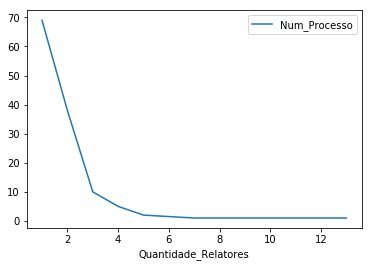

In [12]:
qt_relatores.plot()

### f) A unidade técnica responsável

In [13]:
pd.DataFrame(data.groupby("Unidade_Tecnica_Responsavel").count()["Num_Processo"])

,Num_Processo
Unidade_Tecnica_Responsavel,
A,43
B,42
C,42


## 2) Média de duração por agência e geral?

In [14]:
data["Data_Encerramento"] = data["Data_Encerramento"].replace(["N/D", "N/A"], pd.np.nan)
data2 = data.dropna()
data2["Duracao"] = data2["Data_Encerramento"]-data2["Data_Autuacao"]
duracao_agencia = pd.DataFrame(data2.groupby("Agencia").mean()["Duracao"])
duracao_agencia

,Duracao
Agencia,
I,616
II,776
III,"1,118"
IV,908
IX,"1,223"
V,580
VI,"1,122"
VII,977
VIII,243


In [15]:
duracao_agencia.reset_index(level=0, inplace=True)
duracao_agencia.columns = ["Agencia", "Duracao"]

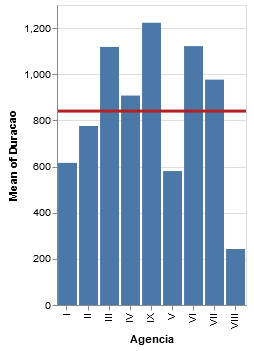

In [16]:
bars = alt.Chart().mark_bar().encode(
    x='Agencia:O',
    y='mean(Duracao):Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7))
).add_selection(
    brush
)

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(Duracao):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

alt.layer(bars, line, data=duracao_agencia)

Este gráfico é interativo. Caso tenha problemas em interagir, clique [aqui](https://bit.ly/2Wq8lzo).

## 3) Qual a relação entre a quantidade de responsáveis com:
### a) A agência

In [17]:
pd.DataFrame(data.groupby(["quant_responsaveis", "Agencia"]).count()["Num_Processo"])

Num_Processo
quant_responsaveis Agencia              
5                  I                  12
                   II                  7
                   III                19
                   IV                  5
                   IX                 26
                   V                  17
                   VI                 17
                   VII                14
                   VIII               10

### b) O ano e total

In [18]:
pd.DataFrame(data.groupby(["quant_responsaveis", "Exercicio_Apurado"]).count()["Num_Processo"])

Num_Processo
quant_responsaveis Exercicio_Apurado              
5                  1,997                         1
                   1,998                         2
                   1,999                         5
                   2,000                         5
                   2,001                         5
                   2,002                         7
                   2,003                         9
                   2,004                         8
                   2,005                         7
                   2,006                         8
                   2,007                        10
                   2,008                        10
                   2,009                         9
                   2,010                        10
                   2,011                         8
                   2,012                         7
                   2,013                         8
                   2,014                         4
                   2,015                         3
                   2,016                         1

### c) O relator

In [19]:
pd.DataFrame(data.groupby(["quant_responsaveis", "Relator"]).count()["Num_Processo"])

Num_Processo
quant_responsaveis Relator              
5                   JF                 1
                   AA                  2
                   AB                  5
                   AC                  4
                   AD                  1
                   AI                  1
                   ALC                 3
                   AO                  2
                   BO                  5
                   BZ                 13
                   GP                  1
                   HC                  1
                   IS                  1
                   JF                 11
                   JL                  8
                   JN                  8
                   JN                  1
                   Jl                  1
                   LR                  2
                   M.V                 1
                   MV                  3
                   Mc                  1
                   RS                 14
                   UA                  5
                   VF                  7
                   VF1                 1
                   WR                 24

### d) A unidade técnica responsável

In [20]:
pd.DataFrame(data.groupby(["quant_responsaveis", "Unidade_Tecnica_Responsavel"]).count()["Num_Processo"])

Num_Processo
quant_responsaveis Unidade_Tecnica_Responsavel              
5                  A                                      43
                   B                                      42
                   C                                      42

### e) A unidade técnica por agir

In [21]:
pd.DataFrame(data.groupby(["quant_responsaveis", "Unidade_Tecnica_Por_Agir"]).count()["Num_Processo"])

Num_Processo
quant_responsaveis Unidade_Tecnica_Por_Agir              
5                  A                                   63
                   B                                   64

## 4) Qual a relação entre a decisão normativa com

### a) A agência

In [22]:
pd.DataFrame(data.groupby(["decisao_normativa", "Agencia"]).count()["Num_Processo"])

Num_Processo
decisao_normativa Agencia              
DN 2004-062       I                   1
                  III                 1
                  IX                  2
                  V                   1
                  VI                  1
                  VII                 1
                  VIII                1
DN 2005-71        III                 1
                  IV                  1
                  IX                  2
                  V                   1
                  VI                  1
                  VII                 1
DN 2006-081       I                   2
                  III                 1
                  IX                  2
                  V                   1
                  VI                  1
                  VII                 1
DN 2007-085       I                   2
                  II                  1
                  III                 1
                  IX                  2
                  V                   1
                  VI                  1
                  VII                 1
                  VIII                1
DN 2008-094       I                   1
                  II                  1
                  III                 1
                  IV                  1
                  IX                  2
                  V                   1
                  VI                  1
                  VII                 1
                  VIII                1
DN 2009-102       I                   1
                  II                  1
                  III                 1
                  IV                  1
                  IX                  2
                  VI                  1
                  VII                 1
                  VIII                1
DN 2010-110       I                   2
                  II                  1
                  III                 1
                  IV                  1
                  IX                  1
                  V                   1
                  VI                  1
                  VII                 1
                  VIII                1
DN 2011-117       II                  1
                  III                 1
                  IX                  2
                  V                   1
                  VI                  1
                  VII                 1
                  VIII                1
DN 2012-124       II                  1
                  III                 1
                  IX                  1
                  V                   1
                  VI                  1
                  VII                 1
                  VIII                1
DN 2013-132       I                   1
                  II                  1
                  III                 1
                  IX                  2
                  V                   1
                  VI                  1
                  VIII                1
DN 2014-140       III                 1
                  IV                  1
                  V                   1
                  VII                 1
DN 2015-147       III                 1
                  IX                  1
                  VI                  1
DN 2016-156       VII                 1
N/D               I                   2
                  III                 7
                  IX                  7
                  V                   7
                  VI                  6
                  VII                 3
                  VIII                2

### b) O ano e total

In [23]:
pd.DataFrame(data.groupby(["decisao_normativa", "Exercicio_Apurado"]).count()["Num_Processo"])

,,Num_Processo
decisao_normativa,Exercicio_Apurado,
DN 2004-062,"2,004",8
DN 2005-71,"2,005",7
DN 2006-081,"2,006",8
DN 2007-085,"2,007",10
DN 2008-094,"2,008",10
DN 2009-102,"2,009",9
DN 2010-110,"2,010",10
DN 2011-117,"2,011",8
DN 2012-124,"2,012",7


### c) O relator

In [24]:
pd.DataFrame(data.groupby(["decisao_normativa", "Relator"]).count()["Num_Processo"])

Num_Processo
decisao_normativa Relator              
DN 2004-062       AO                  1
                  BZ                  3
                  JF                  1
                  JN                  2
                  WR                  1
DN 2005-71        AA                  1
                  AI                  1
                  JF                  1
                  JN                  1
                  RS                  2
                  WR                  1
DN 2006-081       AB                  1
                  BO                  1
                  BZ                  2
                  RS                  1
                  WR                  3
DN 2007-085       AB                  1
                  BO                  1
                  BZ                  3
                  M.V                 1
                  RS                  1
                  WR                  3
DN 2008-094       AC                  1
                  JF                  2
                  JL                  2
                  JN                  1
                  Jl                  1
                  RS                  1
                  VF                  1
                  WR                  1
DN 2009-102       AC                  1
                  ALC                 1
                  JF                  1
                  JL                  2
                  RS                  2
                  VF1                 1
                  WR                  1
DN 2010-110       AC                  1
                  ALC                 2
                  JF                  1
                  JL                  1
                  LR                  1
                  RS                  2
                  VF                  1
                  WR                  1
DN 2011-117        JF                 1
                  AO                  1
                  JF                  1
                  RS                  2
                  WR                  3
DN 2012-124       JF                  2
                  JL                  1
                  JN                  1
                  RS                  1
                  WR                  2
DN 2013-132       AA                  1
                  BZ                  2
                  Mc                  1
                  VF                  2
                  WR                  2
DN 2014-140       AC                  1
                  BZ                  2
                  VF                  1
DN 2015-147       BO                  2
                  JF                  1
DN 2016-156       BO                  1
N/D               AB                  3
                  AD                  1
                  BZ                  1
                  GP                  1
                  HC                  1
                  IS                  1
                  JF                  1
                  JL                  2
                  JN                  3
                  JN                  1
                  LR                  1
                  MV                  3
                  RS                  2
                  UA                  5
                  VF                  2
                  WR                  6

### d) A unidade técnica responsável

In [25]:
decisoes_responsavel = data.groupby(["decisao_normativa", "Unidade_Tecnica_Responsavel"]).count()["Num_Processo"]
pd.DataFrame(decisoes_responsavel)

Num_Processo
decisao_normativa Unidade_Tecnica_Responsavel              
DN 2004-062       A                                       1
                  B                                       4
                  C                                       3
DN 2005-71        A                                       2
                  B                                       3
                  C                                       2
DN 2006-081       A                                       3
                  B                                       1
                  C                                       4
DN 2007-085       A                                       3
                  B                                       2
                  C                                       5
DN 2008-094       A                                       3
                  B                                       2
                  C                                       5
DN 2009-102       A                                       4
                  B                                       4
                  C                                       1
DN 2010-110       A                                       2
                  B                                       3
                  C                                       5
DN 2011-117       A                                       5
                  B                                       2
                  C                                       1
DN 2012-124       A                                       3
                  B                                       3
                  C                                       1
DN 2013-132       A                                       1
                  B                                       4
                  C                                       3
DN 2014-140       A                                       2
                  B                                       1
                  C                                       1
DN 2015-147       A                                       1
                  B                                       2
DN 2016-156       B                                       1
N/D               A                                      13
                  B                                      10
                  C                                      11

### e) A unidade técnica por agir

In [26]:
pd.DataFrame(data.groupby(["decisao_normativa", "Unidade_Tecnica_Por_Agir"]).count()["Num_Processo"])

Num_Processo
decisao_normativa Unidade_Tecnica_Por_Agir              
DN 2004-062       A                                    4
                  B                                    4
DN 2005-71        A                                    3
                  B                                    4
DN 2006-081       A                                    3
                  B                                    5
DN 2007-085       A                                    5
                  B                                    5
DN 2008-094       A                                    5
                  B                                    5
DN 2009-102       A                                    5
                  B                                    4
DN 2010-110       A                                    4
                  B                                    6
DN 2011-117       A                                    2
                  B                                    6
DN 2012-124       A                                    4
                  B                                    3
DN 2013-132       A                                    5
                  B                                    3
DN 2014-140       A                                    3
                  B                                    1
DN 2015-147       A                                    1
                  B                                    2
DN 2016-156       B                                    1
N/D               A                                   19
                  B                                   15